# Lockman SWIRE master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
04829ed (Thu Nov 2 16:57:19 2017 +0000) [with local modifications]


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20170710"

master_catalogue_filename = "master_catalogue_lockman-swire_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_lockman-swire_20171128.fits


## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

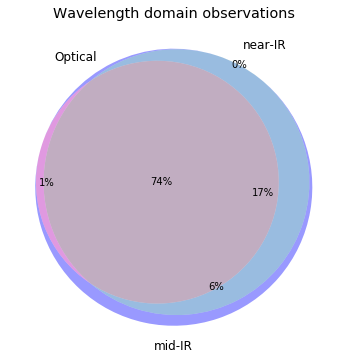

In [5]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

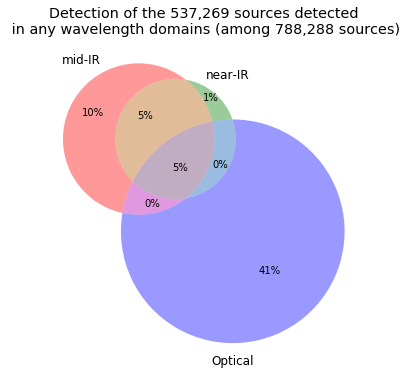

In [6]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["WFC u",          "CFHT Megacam u"]
g_bands = ["WFC g", "RCS g", "CFHT Megacam g",  "GPC1 g"]
r_bands = ["WFC r", "RCS r", "CFHT Megacam r",  "GPC1 r"]
i_bands = ["WFC i", "RCS i",                    "GPC1 i"]
z_bands = ["WFC z", "RCS z", "CFHT Megacam z",  "GPC1 z"]
y_bands = [         "RCS y",                    "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

HELP warning: the column m_wfc_u (WFC u) is empty.


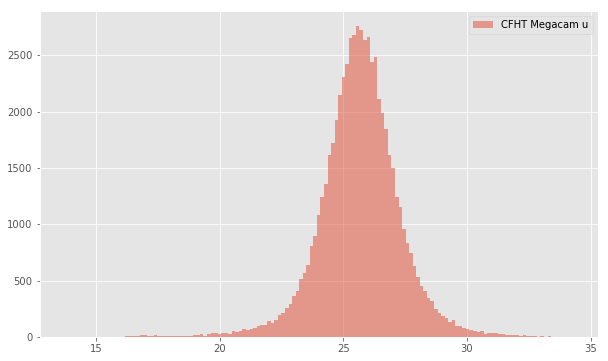

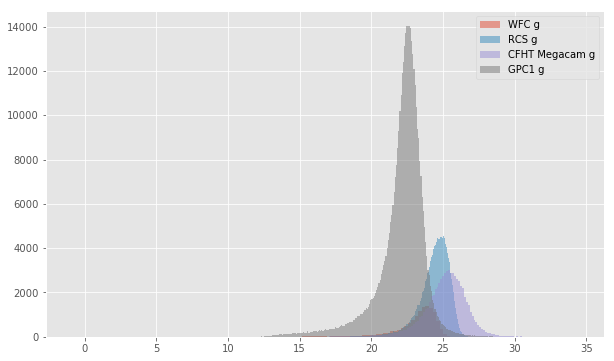

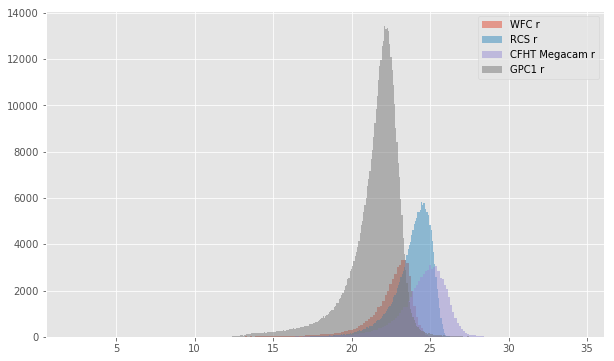

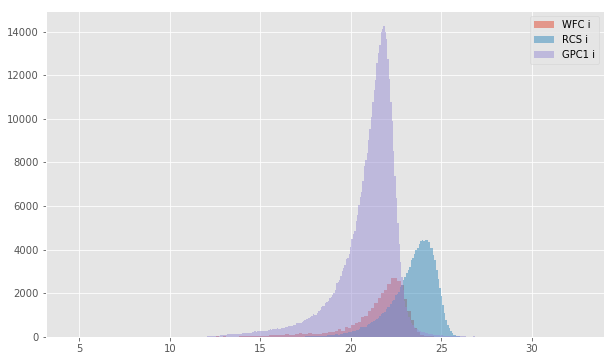

HELP warning: the column m_wfc_z (WFC z) is empty.


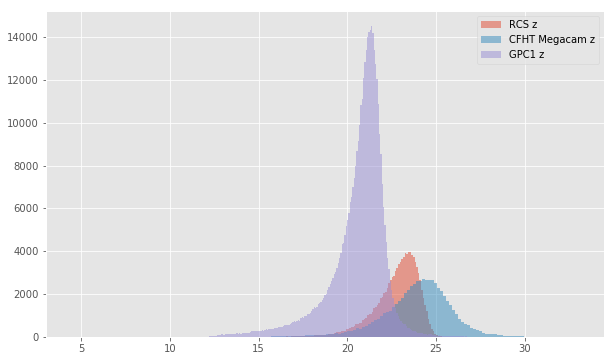

HELP warning: the column m_rcs_y (RCS y) is empty.


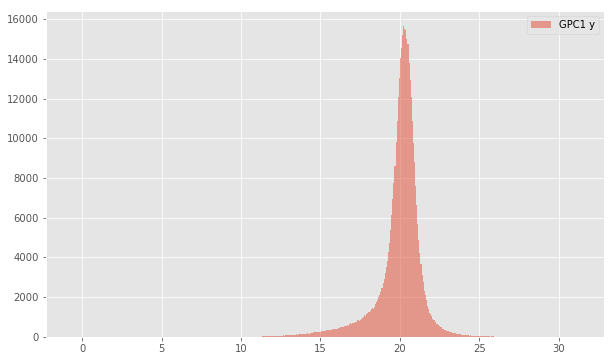

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

No sources have both WFC u (aperture) and CFHT Megacam u (aperture) values.
No sources have both WFC u (total) and CFHT Megacam u (total) values.
No sources have both WFC g (aperture) and RCS g (aperture) values.
RCS g (total) - WFC g (total):
- Median: -0.09
- Median Absolute Deviation: 0.16
- 1% percentile: -0.9518656921386719
- 99% percentile: 0.9360977935791017


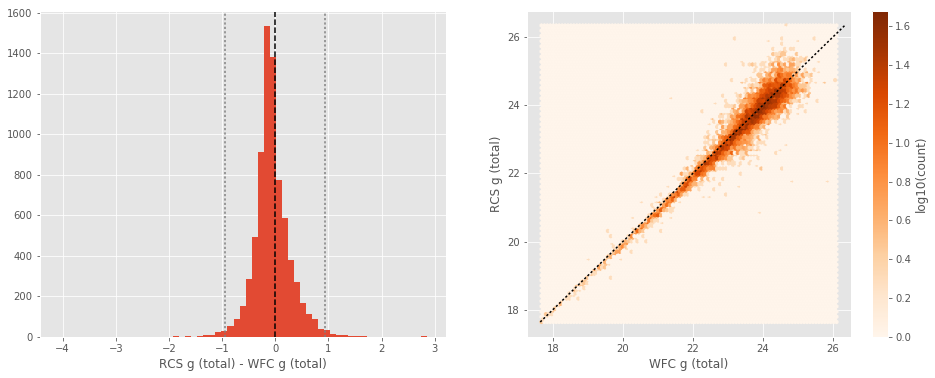

CFHT Megacam g (aperture) - WFC g (aperture):
- Median: 0.18
- Median Absolute Deviation: 0.17
- 1% percentile: -0.3721170806884766
- 99% percentile: 1.2495346260070765


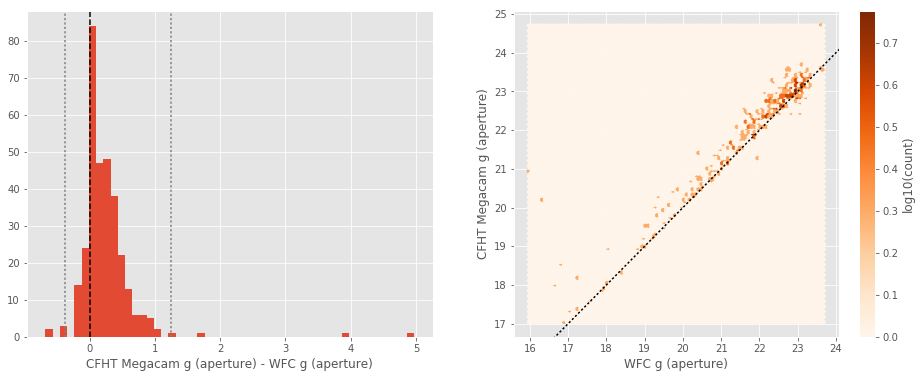

CFHT Megacam g (total) - WFC g (total):
- Median: -0.16
- Median Absolute Deviation: 0.13
- 1% percentile: -1.1891114044189453
- 99% percentile: 2.9850967788696288


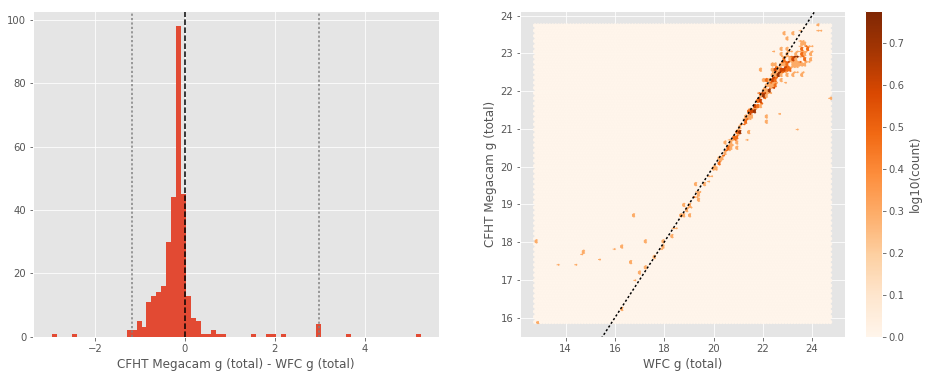

GPC1 g (aperture) - WFC g (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.20
- 1% percentile: -1.5676268768310546
- 99% percentile: 1.951270370483398


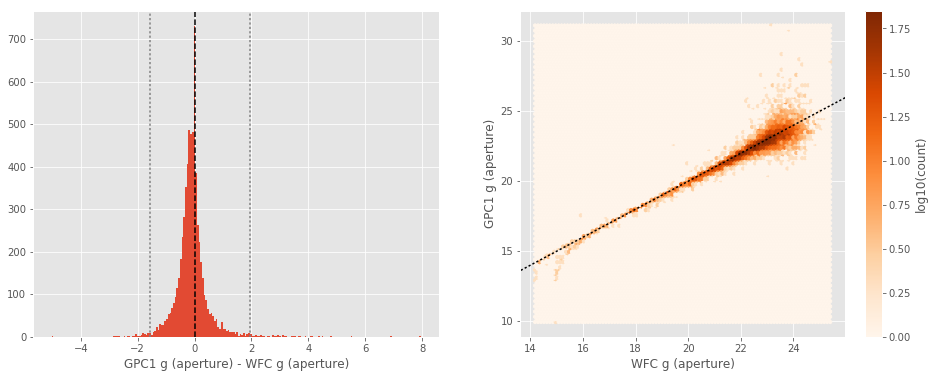

GPC1 g (total) - WFC g (total):
- Median: -0.05
- Median Absolute Deviation: 0.20
- 1% percentile: -1.8761689949035645
- 99% percentile: 1.4569418907165532


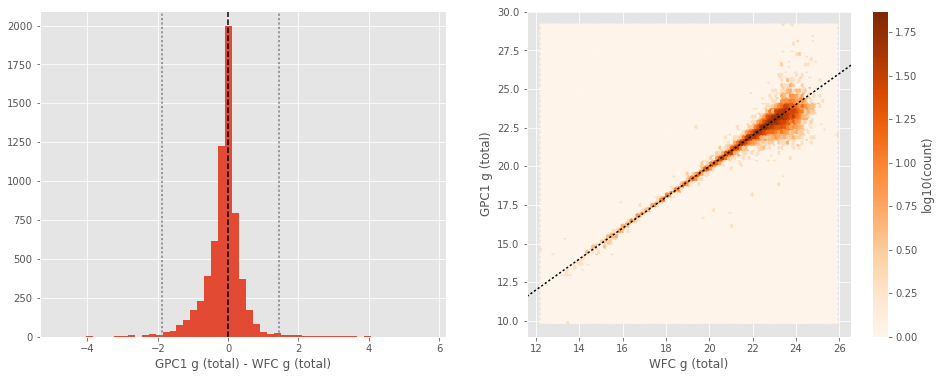

No sources have both RCS g (aperture) and CFHT Megacam g (aperture) values.
CFHT Megacam g (total) - RCS g (total):
- Median: 0.07
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9848004341125488
- 99% percentile: 1.1391736602783198


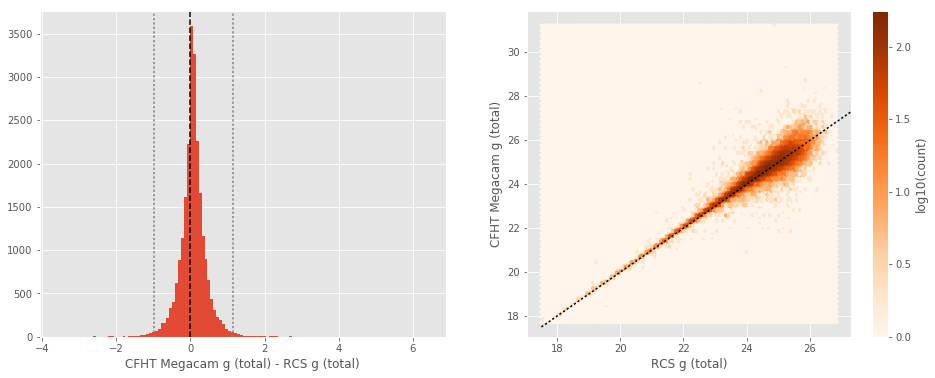

No sources have both RCS g (aperture) and GPC1 g (aperture) values.
GPC1 g (total) - RCS g (total):
- Median: 0.03
- Median Absolute Deviation: 0.29
- 1% percentile: -2.912109851837158
- 99% percentile: 1.918372135162355


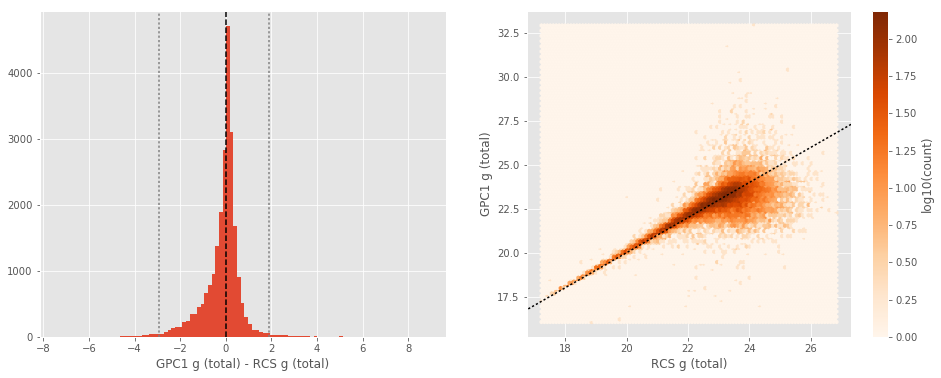

GPC1 g (aperture) - CFHT Megacam g (aperture):
- Median: -0.35
- Median Absolute Deviation: 0.34
- 1% percentile: -2.8761429595947265
- 99% percentile: 1.9586801147460926


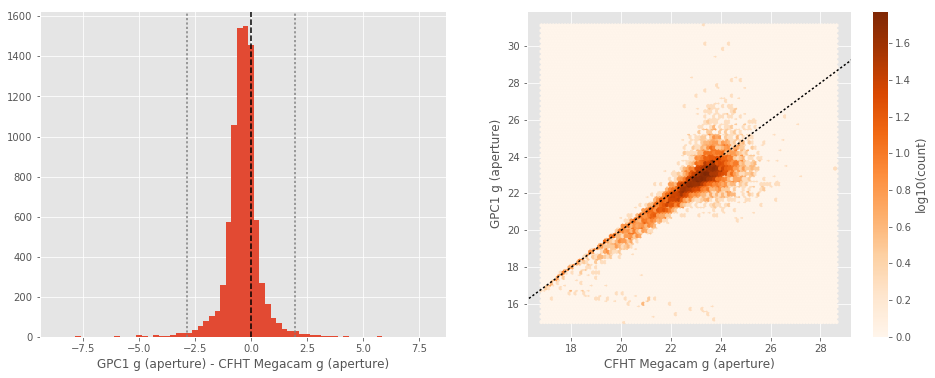

GPC1 g (total) - CFHT Megacam g (total):
- Median: 0.02
- Median Absolute Deviation: 0.22
- 1% percentile: -3.06094970703125
- 99% percentile: 1.6623665046691884


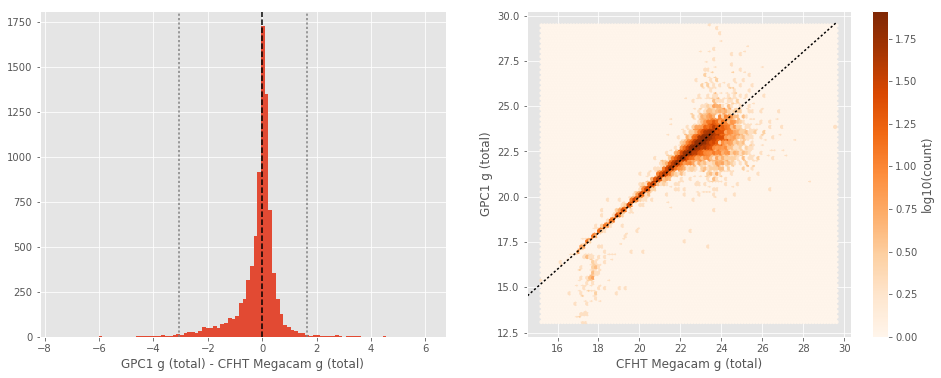

No sources have both WFC r (aperture) and RCS r (aperture) values.
RCS r (total) - WFC r (total):
- Median: -0.14
- Median Absolute Deviation: 0.14
- 1% percentile: -0.9404141616821289
- 99% percentile: 0.8535783576965301


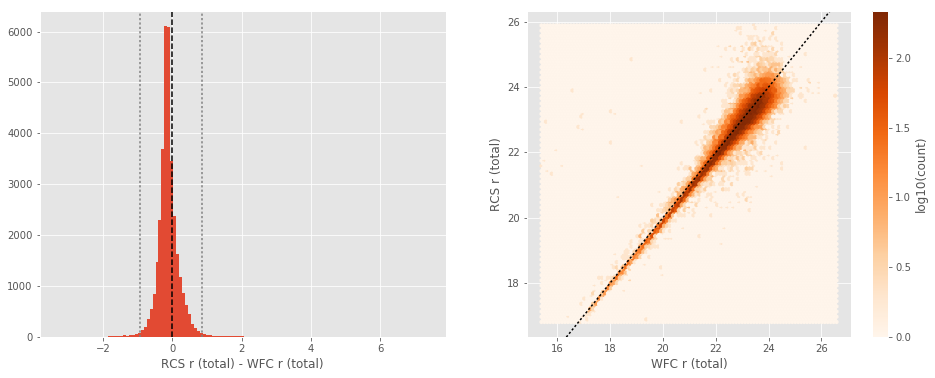

CFHT Megacam r (aperture) - WFC r (aperture):
- Median: 0.18
- Median Absolute Deviation: 0.14
- 1% percentile: -0.4613451385498047
- 99% percentile: 1.0706971740722673


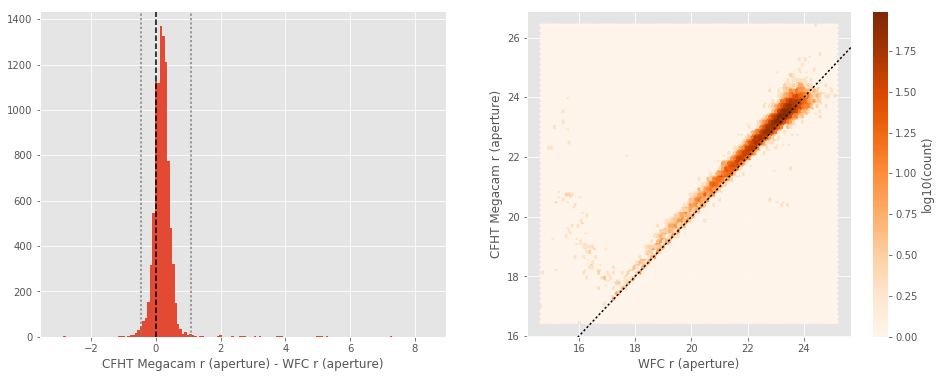

CFHT Megacam r (total) - WFC r (total):
- Median: -0.07
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9188140869140624
- 99% percentile: 1.394046592712402


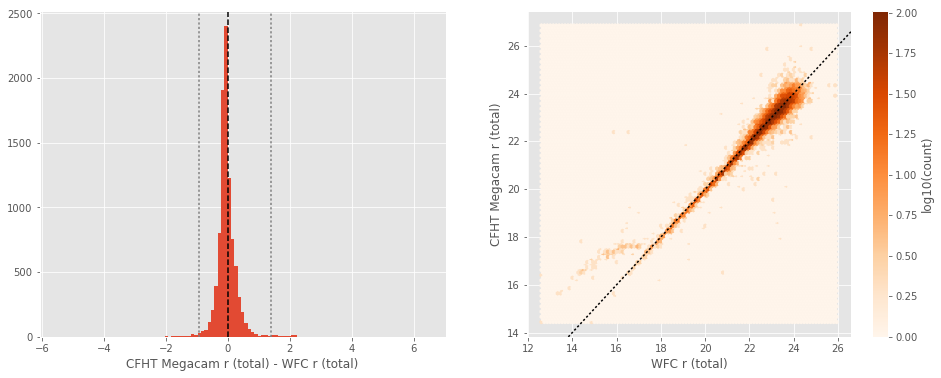

GPC1 r (aperture) - WFC r (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1057004165649413
- 99% percentile: 1.036328163146968


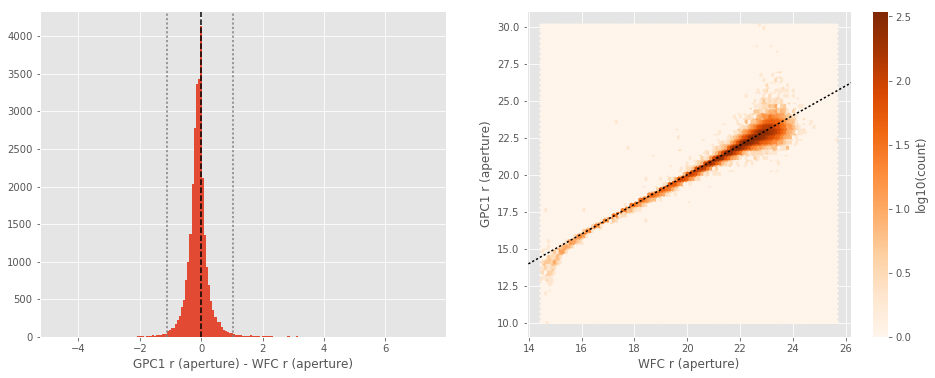

GPC1 r (total) - WFC r (total):
- Median: -0.03
- Median Absolute Deviation: 0.15
- 1% percentile: -1.552546272277832
- 99% percentile: 0.9325369834899899


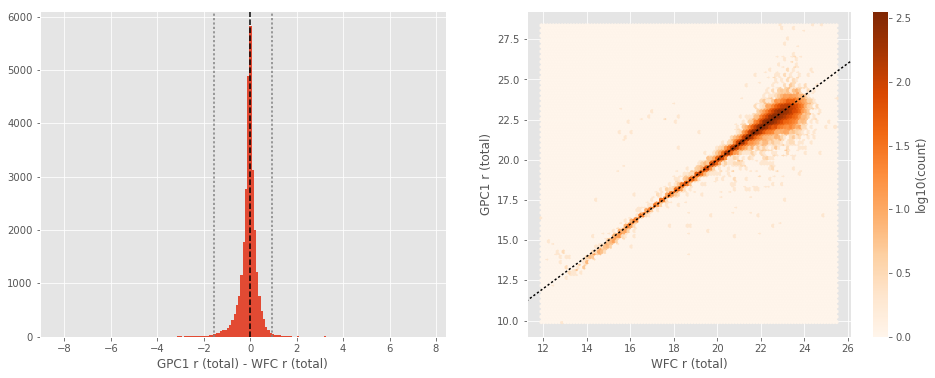

No sources have both RCS r (aperture) and CFHT Megacam r (aperture) values.
CFHT Megacam r (total) - RCS r (total):
- Median: 0.08
- Median Absolute Deviation: 0.17
- 1% percentile: -1.1810527801513673
- 99% percentile: 1.2931591033935543


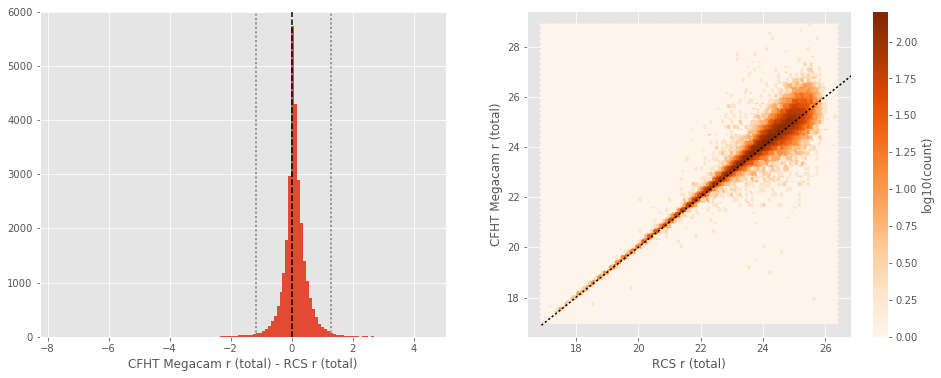

No sources have both RCS r (aperture) and GPC1 r (aperture) values.
GPC1 r (total) - RCS r (total):
- Median: 0.10
- Median Absolute Deviation: 0.14
- 1% percentile: -1.830523147583008
- 99% percentile: 0.9974013328552236


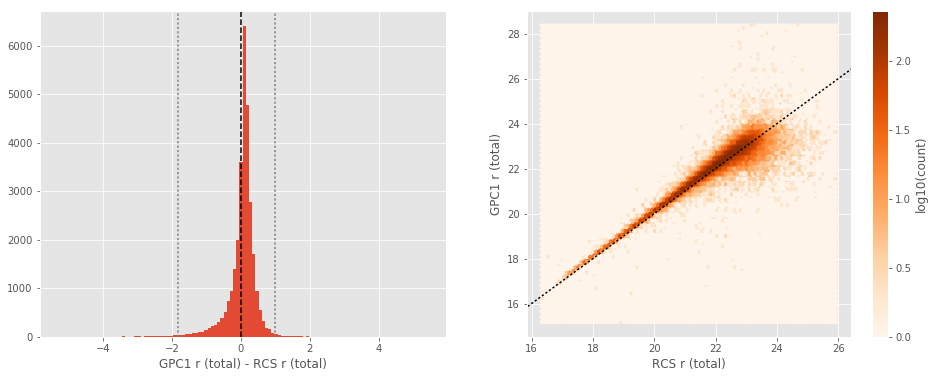

GPC1 r (aperture) - CFHT Megacam r (aperture):
- Median: -0.30
- Median Absolute Deviation: 0.25
- 1% percentile: -2.4756964302062987
- 99% percentile: 0.964333629608155


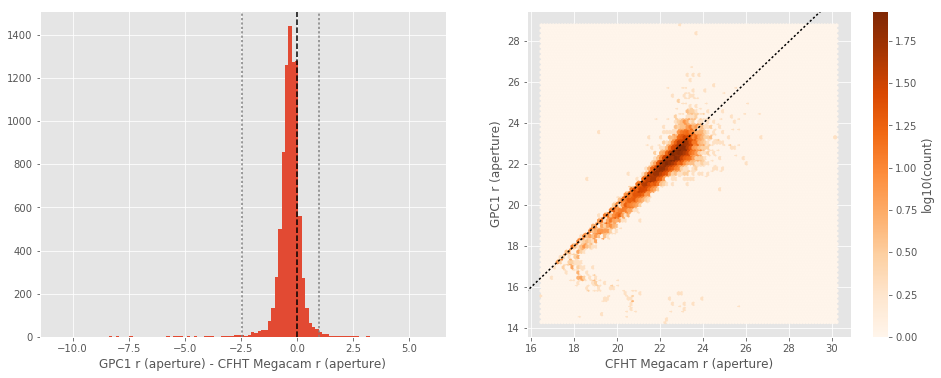

GPC1 r (total) - CFHT Megacam r (total):
- Median: 0.06
- Median Absolute Deviation: 0.13
- 1% percentile: -2.2557369804382326
- 99% percentile: 0.9731683731079102


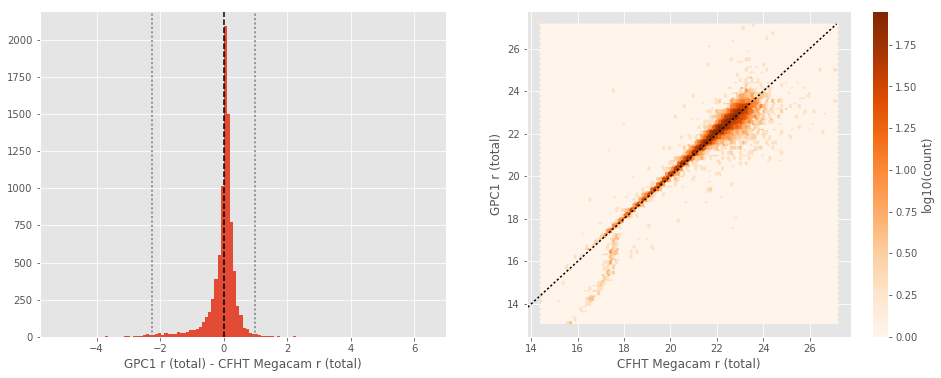

No sources have both WFC i (aperture) and RCS i (aperture) values.
RCS i (total) - WFC i (total):
- Median: -0.04
- Median Absolute Deviation: 0.20
- 1% percentile: -0.8999996185302734
- 99% percentile: 1.3543567276000994


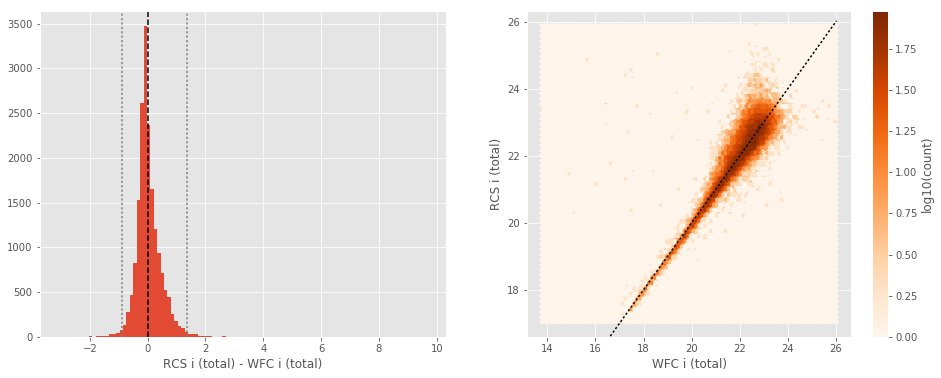

GPC1 i (aperture) - WFC i (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.17
- 1% percentile: -1.1814455795288086
- 99% percentile: 1.312905502319335


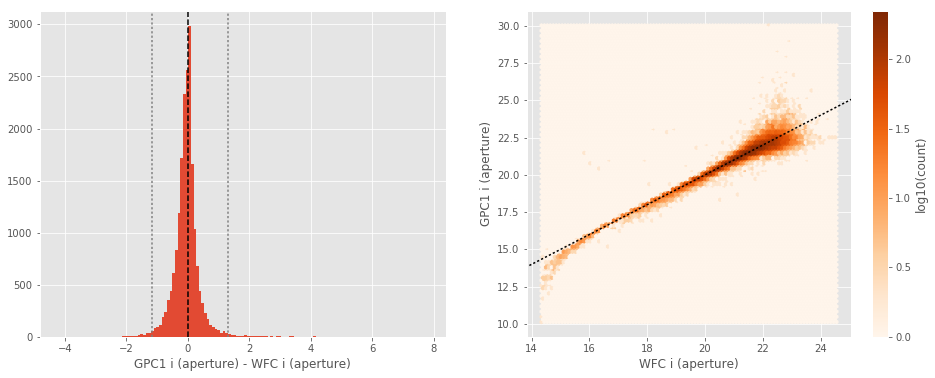

GPC1 i (total) - WFC i (total):
- Median: 0.06
- Median Absolute Deviation: 0.17
- 1% percentile: -1.2434930801391602
- 99% percentile: 1.1642466354370162


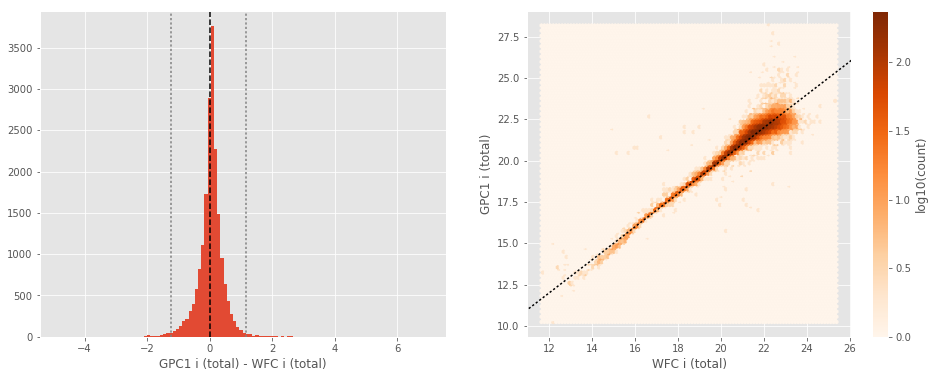

No sources have both RCS i (aperture) and GPC1 i (aperture) values.
GPC1 i (total) - RCS i (total):
- Median: 0.13
- Median Absolute Deviation: 0.16
- 1% percentile: -1.8354370498657226
- 99% percentile: 1.033058280944823


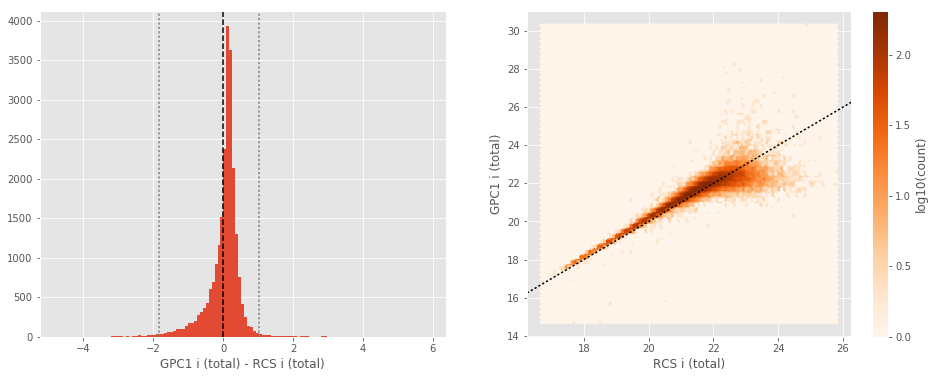

No sources have both WFC z (aperture) and RCS z (aperture) values.
No sources have both WFC z (total) and RCS z (total) values.
No sources have both WFC z (aperture) and CFHT Megacam z (aperture) values.
No sources have both WFC z (total) and CFHT Megacam z (total) values.
No sources have both WFC z (aperture) and GPC1 z (aperture) values.
No sources have both WFC z (total) and GPC1 z (total) values.
No sources have both RCS z (aperture) and CFHT Megacam z (aperture) values.
CFHT Megacam z (total) - RCS z (total):
- Median: 0.07
- Median Absolute Deviation: 0.23
- 1% percentile: -1.1623949813842773
- 99% percentile: 2.179031333923342


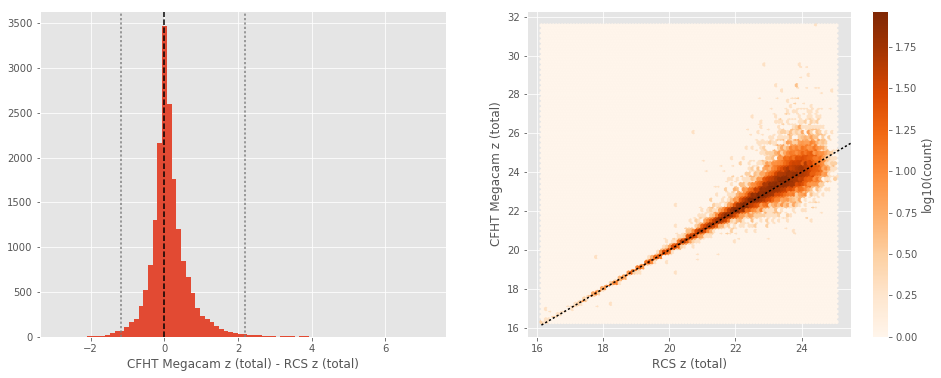

No sources have both RCS z (aperture) and GPC1 z (aperture) values.
GPC1 z (total) - RCS z (total):
- Median: 0.07
- Median Absolute Deviation: 0.25
- 1% percentile: -2.2422707176208494
- 99% percentile: 1.692342987060535


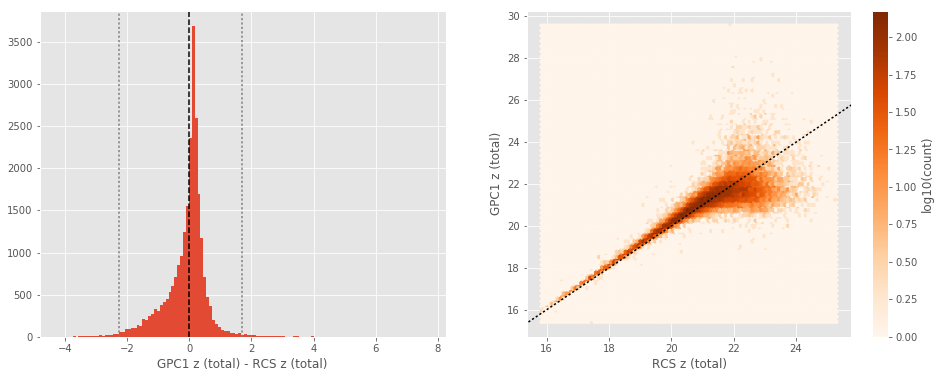

GPC1 z (aperture) - CFHT Megacam z (aperture):
- Median: -0.25
- Median Absolute Deviation: 0.28
- 1% percentile: -2.3576556205749513
- 99% percentile: 1.5895685386657696


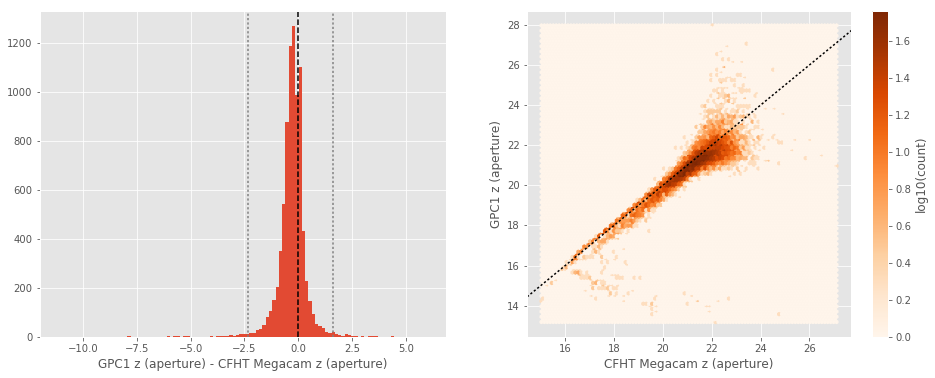

GPC1 z (total) - CFHT Megacam z (total):
- Median: 0.12
- Median Absolute Deviation: 0.20
- 1% percentile: -2.0780950832366942
- 99% percentile: 1.5819815444946286


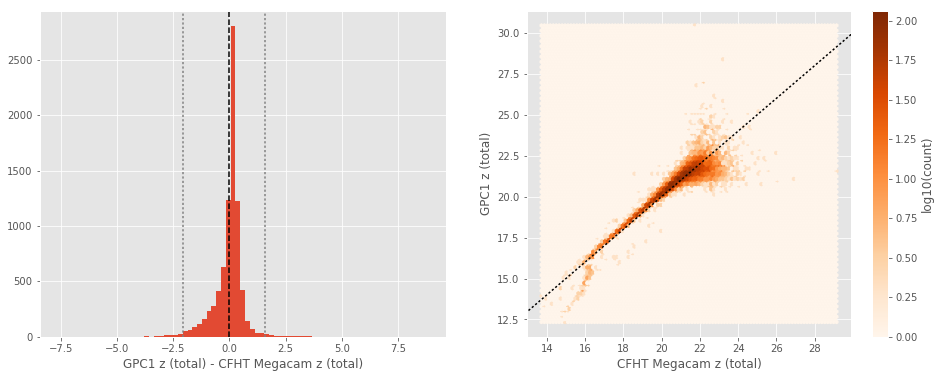

No sources have both RCS y (aperture) and GPC1 y (aperture) values.
No sources have both RCS y (total) and GPC1 y (total) values.


In [9]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [10]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [12]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_Lockman-SWIRE.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

No sources have both SDSS u (fiberMag) and WFC u (aperture) values.
No sources have both SDSS u (petroMag) and WFC u (total) values.
CFHT Megacam u (aperture) - SDSS u (fiberMag):
- Median: 0.04
- Median Absolute Deviation: 0.51
- 1% percentile: -1.6204133224487305
- 99% percentile: 3.237242431640624


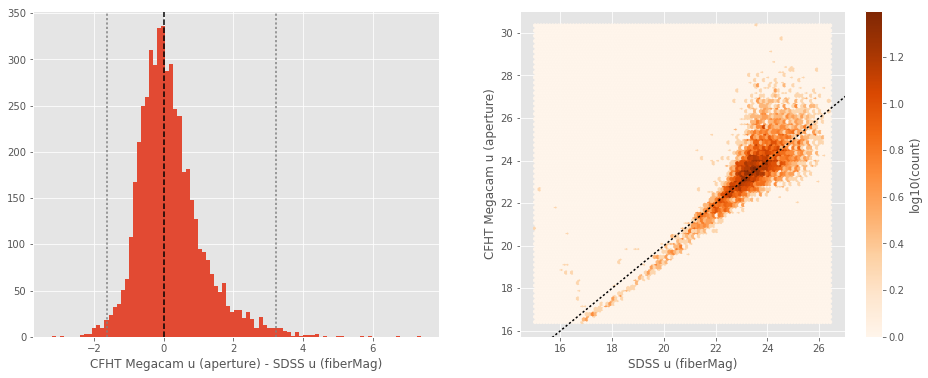

CFHT Megacam u (total) - SDSS u (petroMag):
- Median: 0.04
- Median Absolute Deviation: 0.51
- 1% percentile: -1.6204133224487305
- 99% percentile: 3.237242431640624


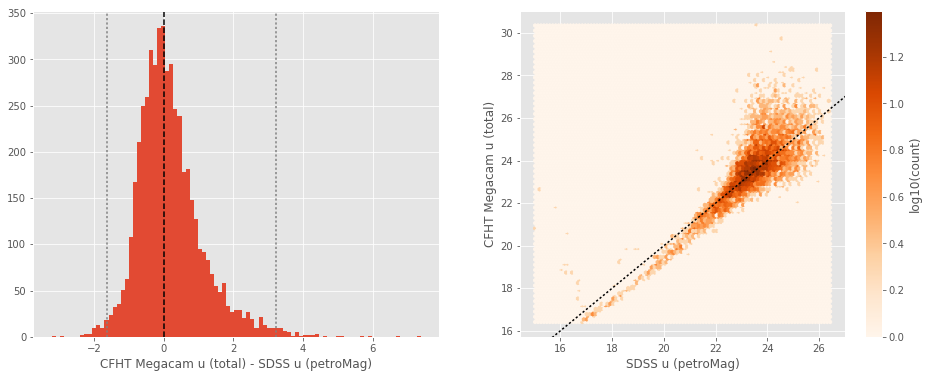

WFC g (aperture) - SDSS g (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.11
- 1% percentile: -1.0213998413085938
- 99% percentile: 0.34259757995605455


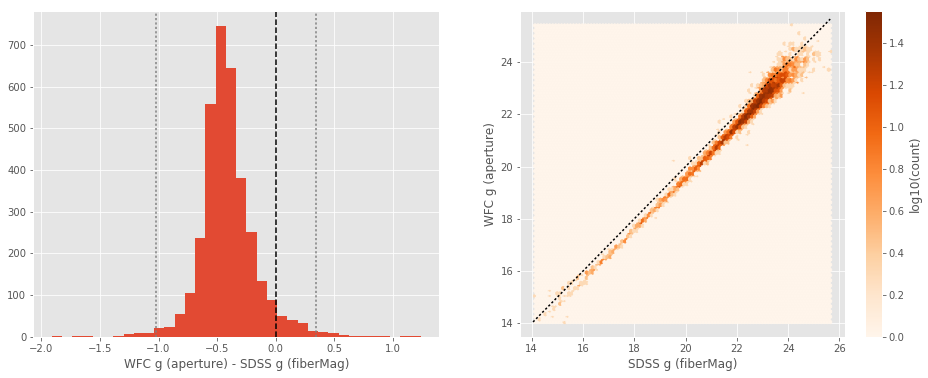

WFC g (total) - SDSS g (petroMag):
- Median: -0.43
- Median Absolute Deviation: 0.11
- 1% percentile: -1.0213998413085938
- 99% percentile: 0.34259757995605455


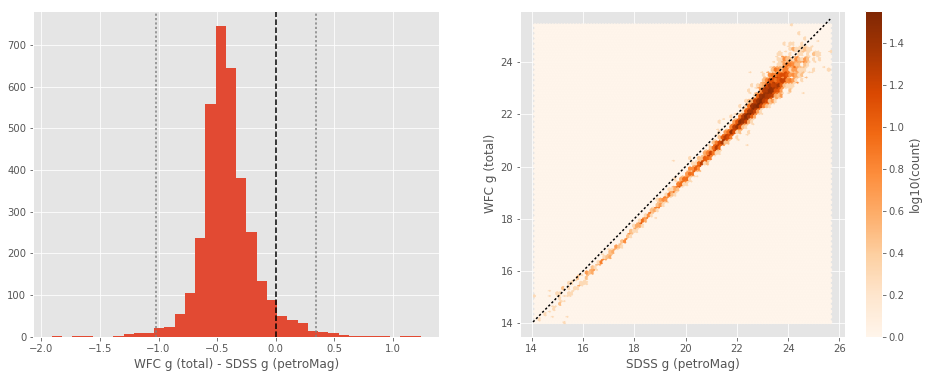

No sources have both SDSS g (fiberMag) and RCS g (aperture) values.
No sources have both SDSS g (petroMag) and RCS g (total) values.
CFHT Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.24
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9706756591796875
- 99% percentile: 1.2579847335815395


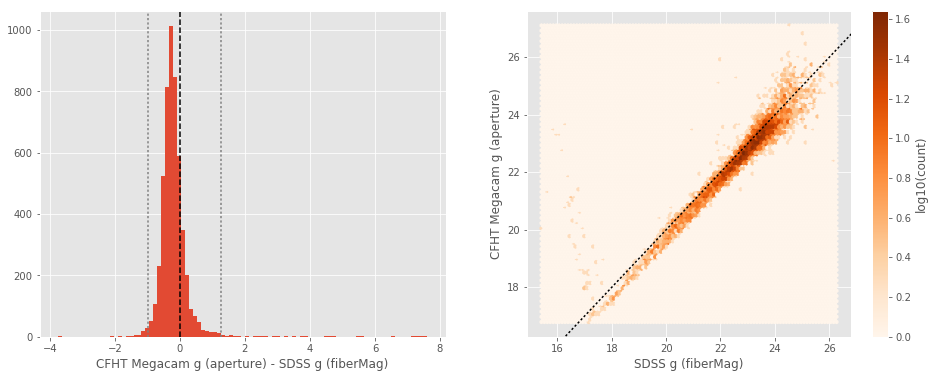

CFHT Megacam g (total) - SDSS g (petroMag):
- Median: -0.24
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9706756591796875
- 99% percentile: 1.2579847335815395


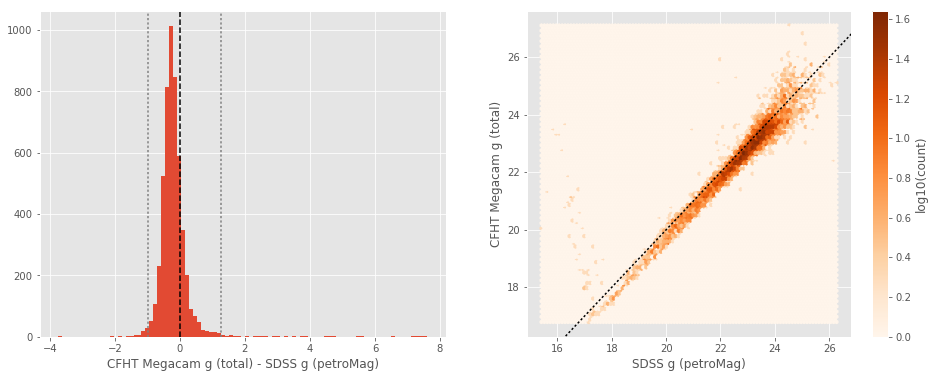

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.57
- Median Absolute Deviation: 0.26
- 1% percentile: -2.4507116317749023
- 99% percentile: 1.7089785385131726


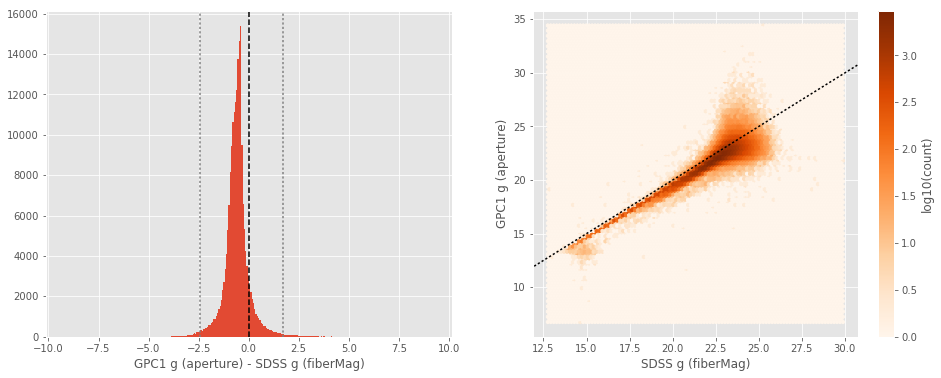

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.57
- Median Absolute Deviation: 0.26
- 1% percentile: -2.4507116317749023
- 99% percentile: 1.7089785385131726


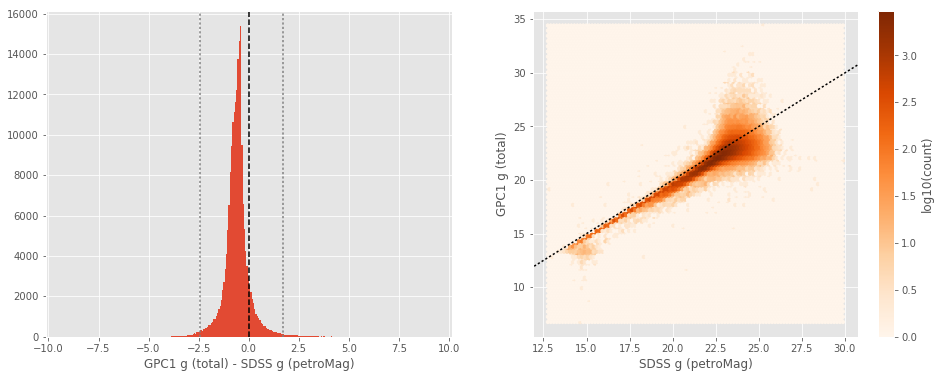

WFC r (aperture) - SDSS r (fiberMag):
- Median: -0.34
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9761717224121094
- 99% percentile: 0.31504284858703385


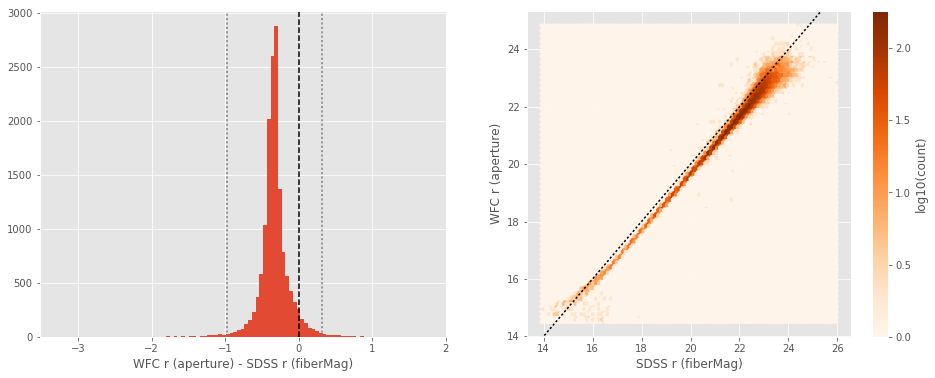

WFC r (total) - SDSS r (petroMag):
- Median: -0.34
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9761717224121094
- 99% percentile: 0.31504284858703385


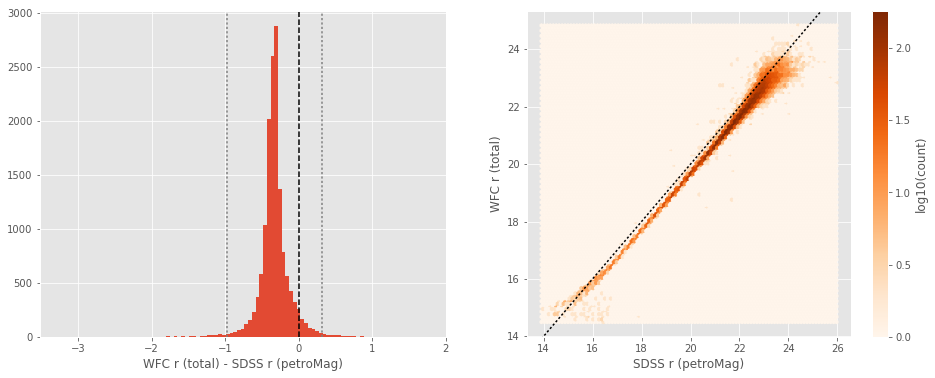

No sources have both SDSS r (fiberMag) and RCS r (aperture) values.
No sources have both SDSS r (petroMag) and RCS r (total) values.
CFHT Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.16
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8671148300170898
- 99% percentile: 2.516313228607177


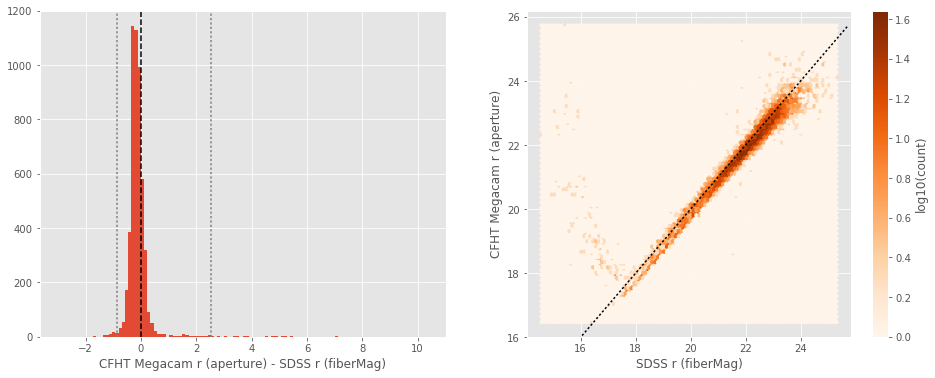

CFHT Megacam r (total) - SDSS r (petroMag):
- Median: -0.16
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8671148300170898
- 99% percentile: 2.516313228607177


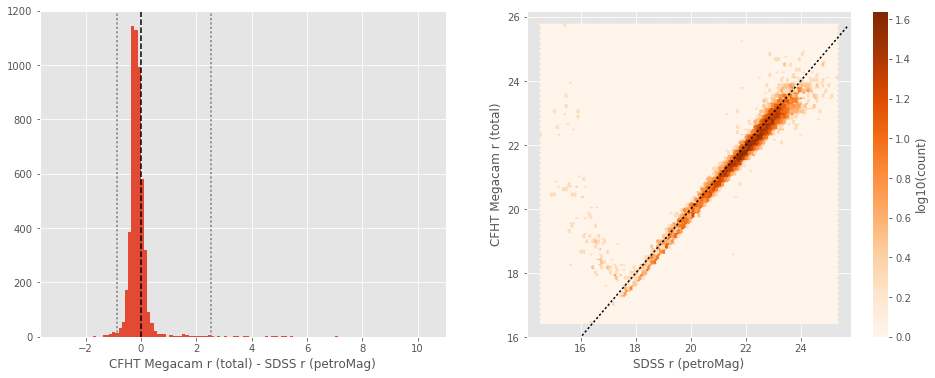

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.45
- Median Absolute Deviation: 0.14
- 1% percentile: -1.5382772827148439
- 99% percentile: 0.5745637702941884


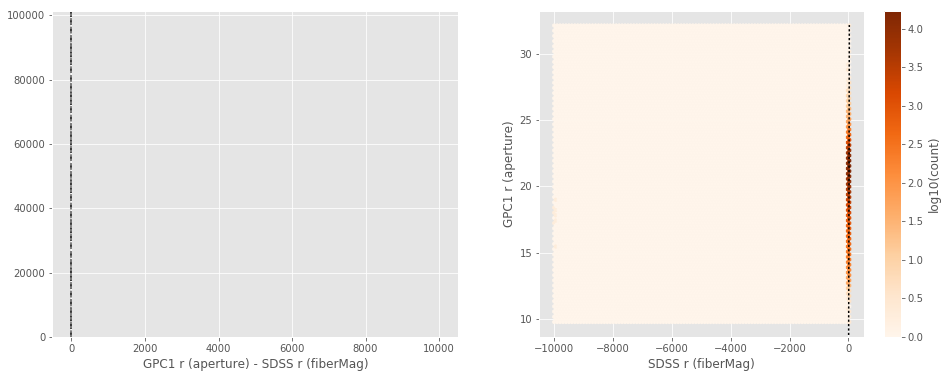

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.45
- Median Absolute Deviation: 0.14
- 1% percentile: -1.5382772827148439
- 99% percentile: 0.5745637702941884


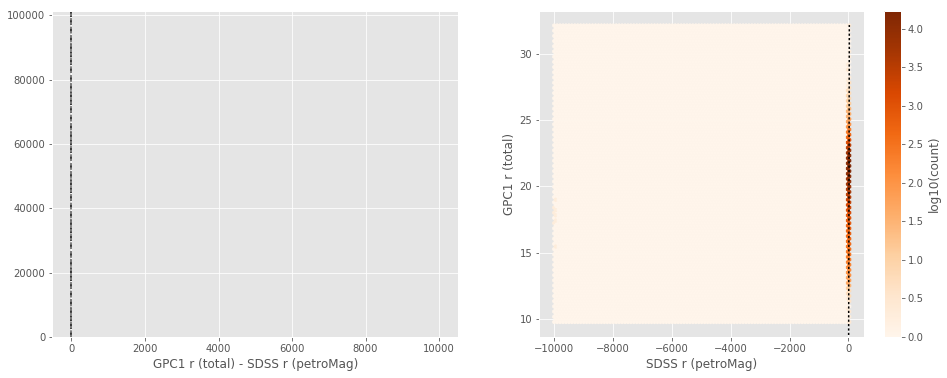

WFC i (aperture) - SDSS i (fiberMag):
- Median: -0.40
- Median Absolute Deviation: 0.08
- 1% percentile: -1.0136065864562989
- 99% percentile: 0.3811852645874021


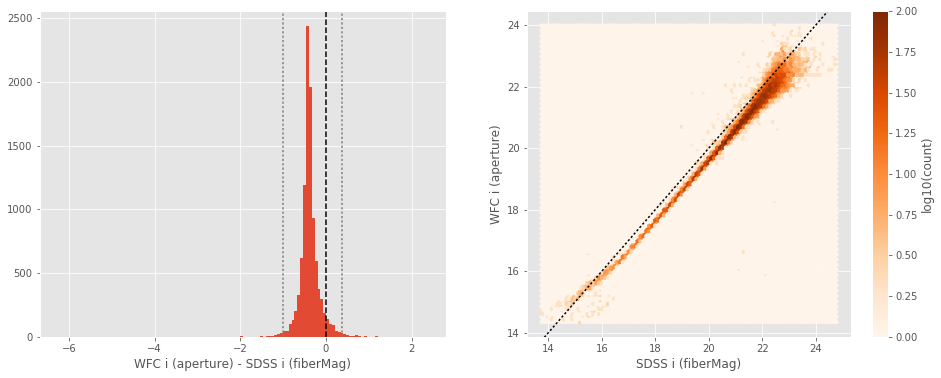

WFC i (total) - SDSS i (petroMag):
- Median: -0.40
- Median Absolute Deviation: 0.08
- 1% percentile: -1.0136065864562989
- 99% percentile: 0.3811852645874021


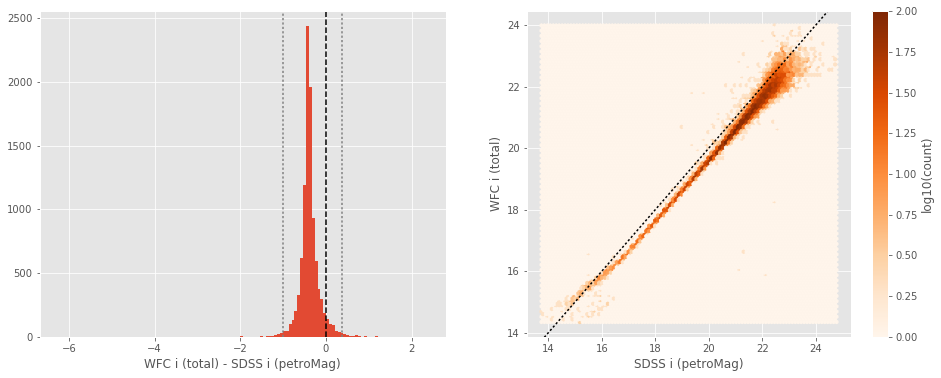

No sources have both SDSS i (fiberMag) and RCS i (aperture) values.
No sources have both SDSS i (petroMag) and RCS i (total) values.
GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.12
- 1% percentile: -1.1260074615478515
- 99% percentile: 0.35808029174804673


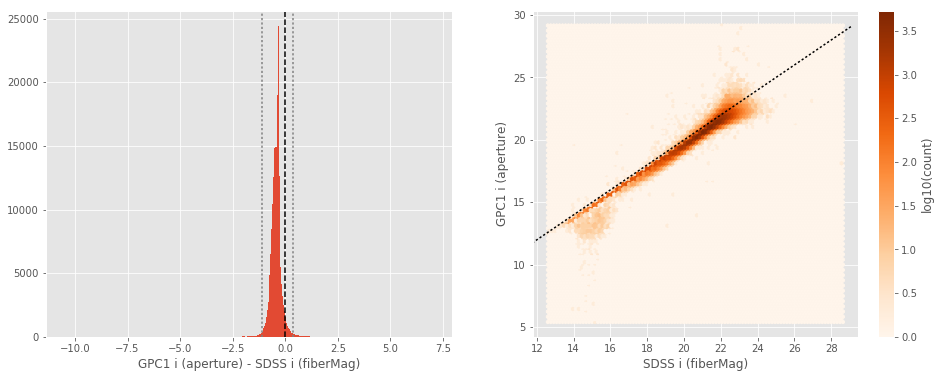

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.43
- Median Absolute Deviation: 0.12
- 1% percentile: -1.1260074615478515
- 99% percentile: 0.35808029174804673


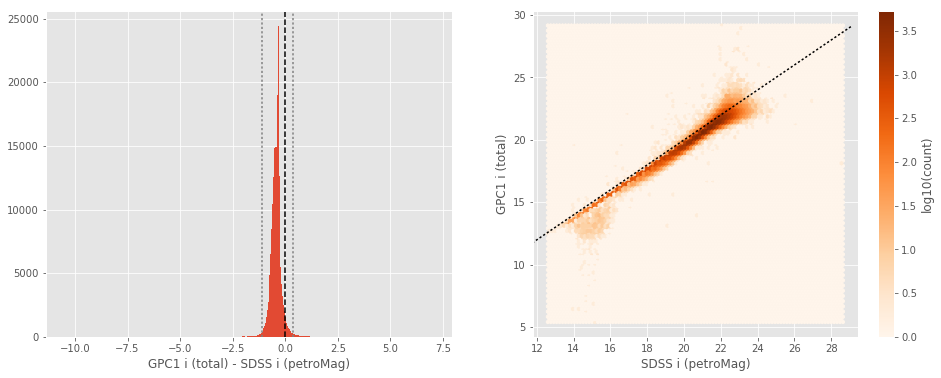

No sources have both SDSS z (fiberMag) and WFC z (aperture) values.
No sources have both SDSS z (petroMag) and WFC z (total) values.
No sources have both SDSS z (fiberMag) and RCS z (aperture) values.
No sources have both SDSS z (petroMag) and RCS z (total) values.
CFHT Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.12
- Median Absolute Deviation: 0.21
- 1% percentile: -1.2100652122497557
- 99% percentile: 1.987371759414679


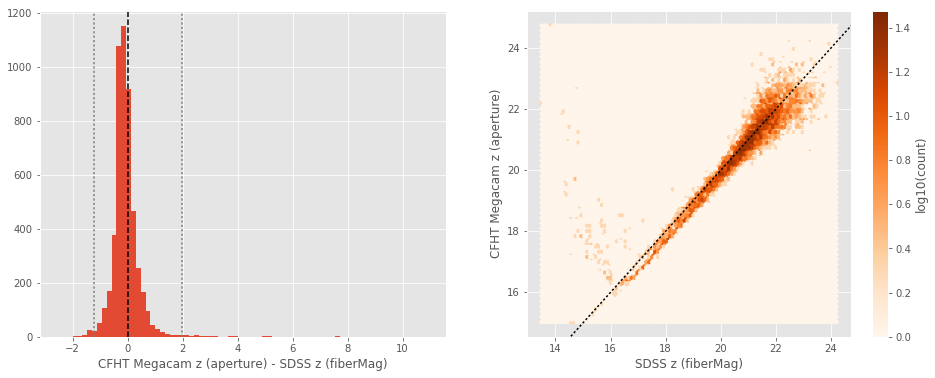

CFHT Megacam z (total) - SDSS z (petroMag):
- Median: -0.12
- Median Absolute Deviation: 0.21
- 1% percentile: -1.2100652122497557
- 99% percentile: 1.987371759414679


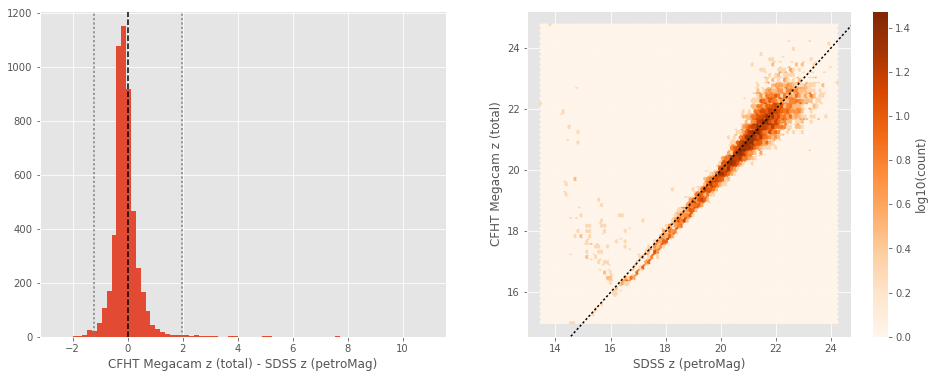

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.33
- Median Absolute Deviation: 0.17
- 1% percentile: -1.3862675857543945
- 99% percentile: 0.9916238403320334


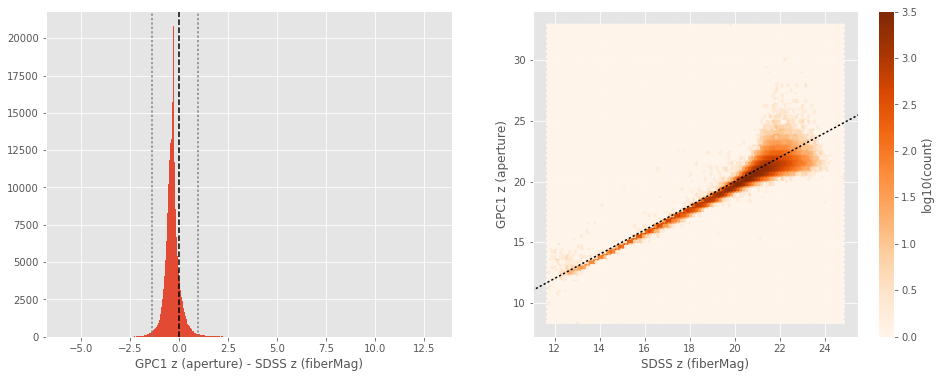

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.33
- Median Absolute Deviation: 0.17
- 1% percentile: -1.3862675857543945
- 99% percentile: 0.9916238403320334


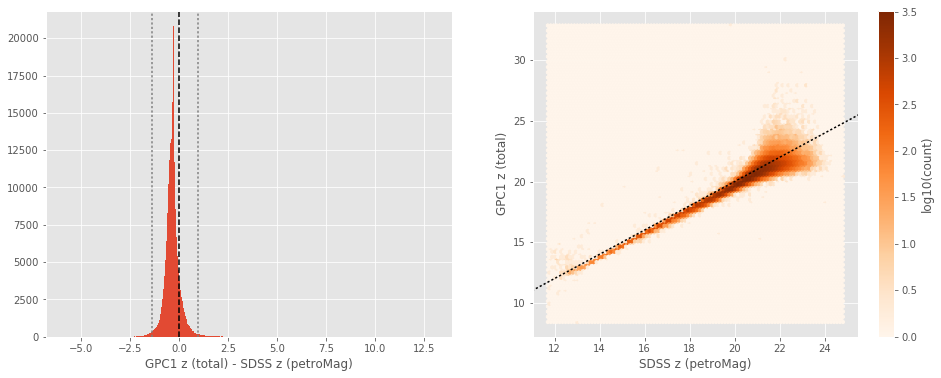

In [13]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [14]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [15]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_Lockman-SWIRE.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

WFCAM J (total) - 2MASS J:
- Median: 0.01
- Median Absolute Deviation: 0.06
- 1% percentile: -1.0059721362211045
- 99% percentile: 0.44716994568807256


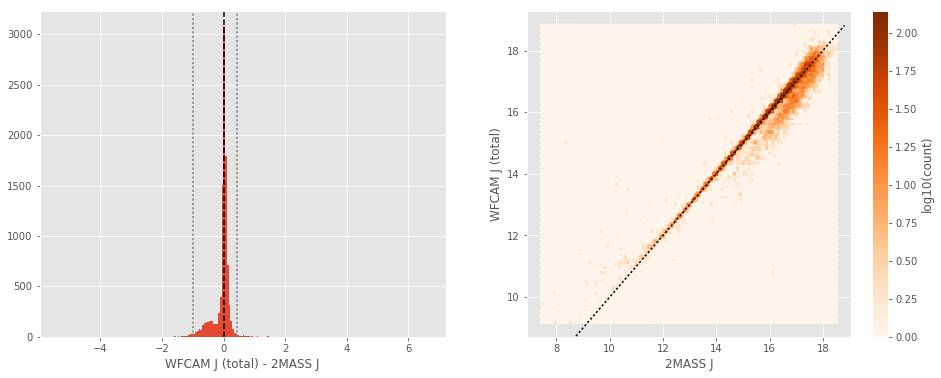

In [16]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_wfcam_j'][ml_twomass_idx],
                labels=("2MASS J", "WFCAM J (total)"))

WFCAM Ks-like (total) - 2MASS Ks:
- Median: 0.07
- Median Absolute Deviation: 0.07
- 1% percentile: -0.7804353231676634
- 99% percentile: 0.8694801316205489


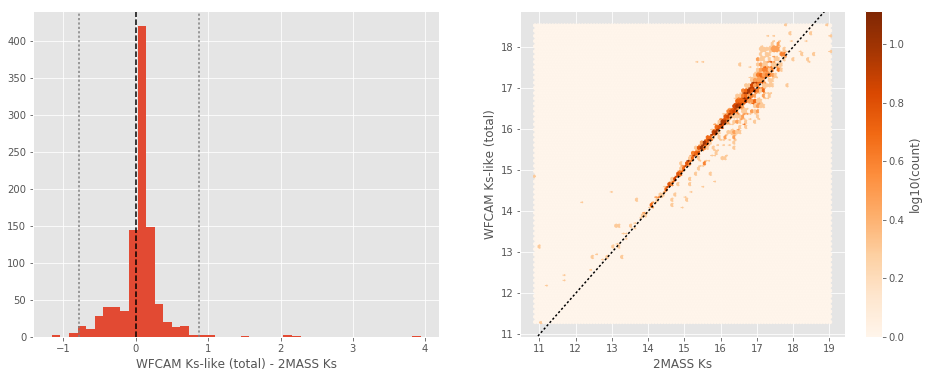

In [17]:
wfcam_ks_like = master_catalogue['m_wfcam_k'] + 0.003 + 0.004 * (
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, wfcam_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "WFCAM Ks-like (total)"))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [18]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 67492 / 788288 (8.56%)


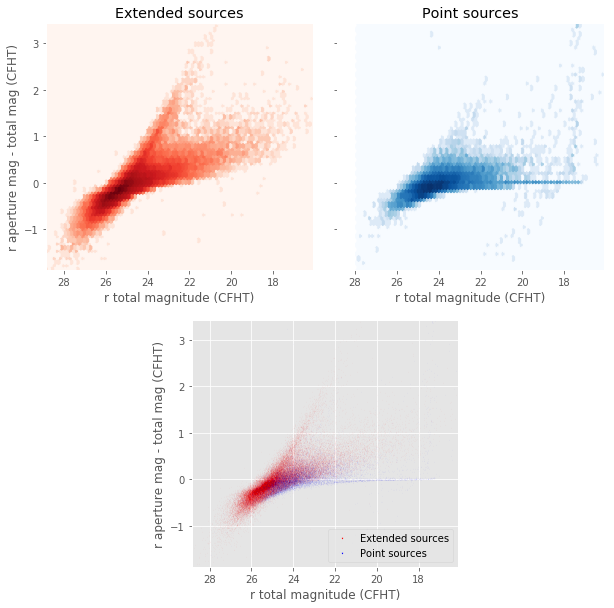

In [19]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_r'],
    master_catalogue['m_ap_cfht_megacam_r'] - master_catalogue['m_cfht_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 7233 / 788288 (0.92%)


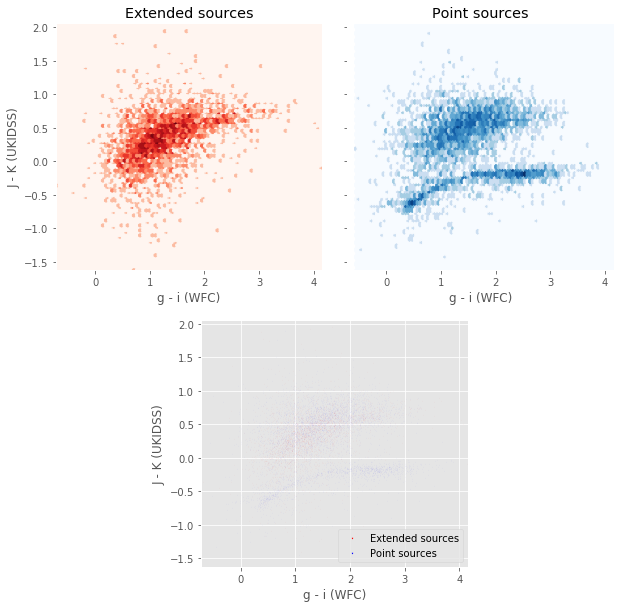

In [20]:
nb_ccplots(
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    "g - i (WFC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 6842 / 788288 (0.87%)


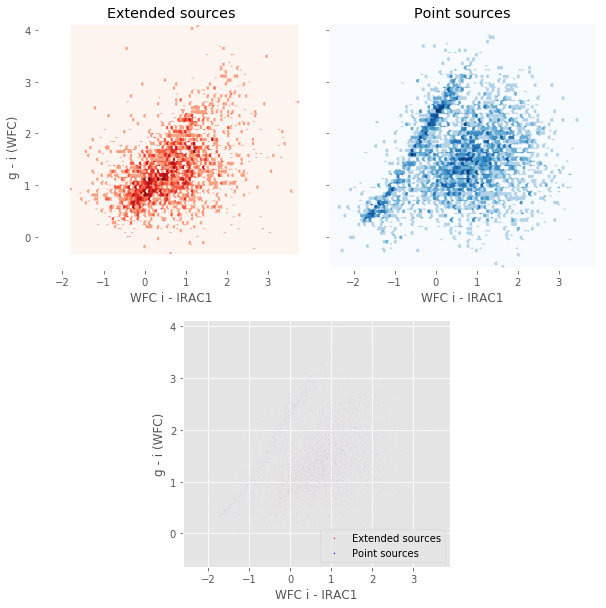

In [21]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 56738 / 788288 (7.20%)


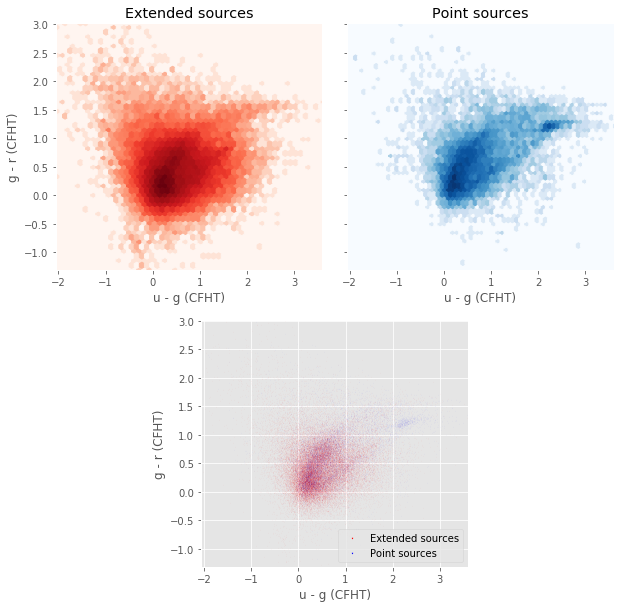

In [22]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_u'] - master_catalogue['m_cfht_megacam_g'],
    master_catalogue['m_cfht_megacam_g'] - master_catalogue['m_cfht_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 8594 / 788288 (1.09%)


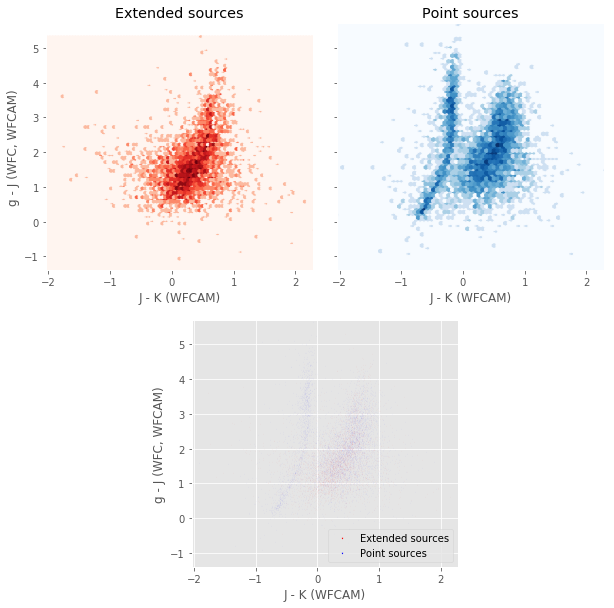

In [23]:
nb_ccplots(
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfcam_j'],
    "J - K (WFCAM)", "g - J (WFC, WFCAM)",
    master_catalogue["stellarity"]
)

In [24]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_wfc_z'],
    master_catalogue['m_wfc_z'] - master_catalogue['m_wfcam_j'],
    "i - z (WFC)", "z - J (WFC, WFCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 788288 (0.00%)
HELP warning: no sources with observations in both bands


Number of source used: 5425 / 788288 (0.69%)


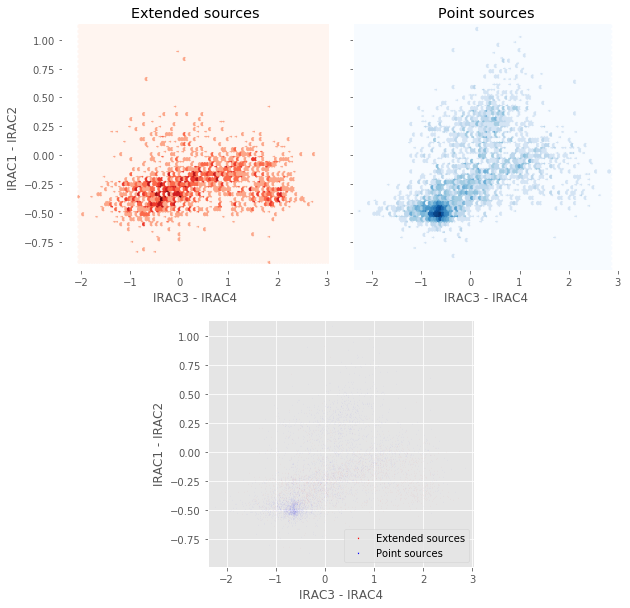

In [25]:
nb_ccplots(
    master_catalogue['m_irac_i3'] - master_catalogue['m_irac_i4'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)